In [22]:
import pandas as pd

In [23]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
all_series["Monthly sales of company X"]

0     154
1      96
2      73
3      49
4      36
     ... 
72    628
73    308
74    324
75    248
76    272
Name: Count, Length: 77, dtype: int64

In [25]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

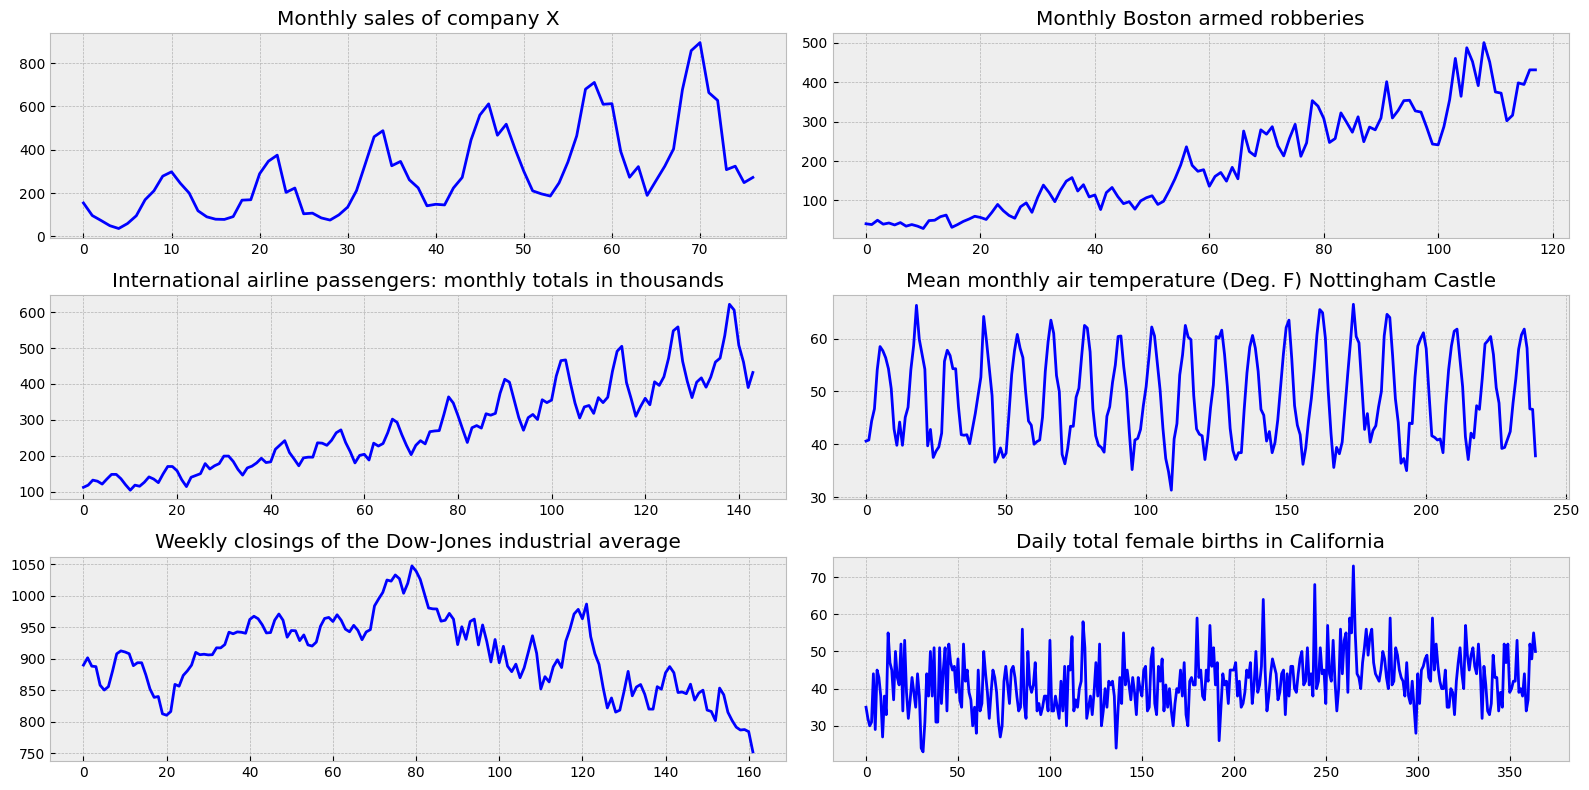

In [26]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [47]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

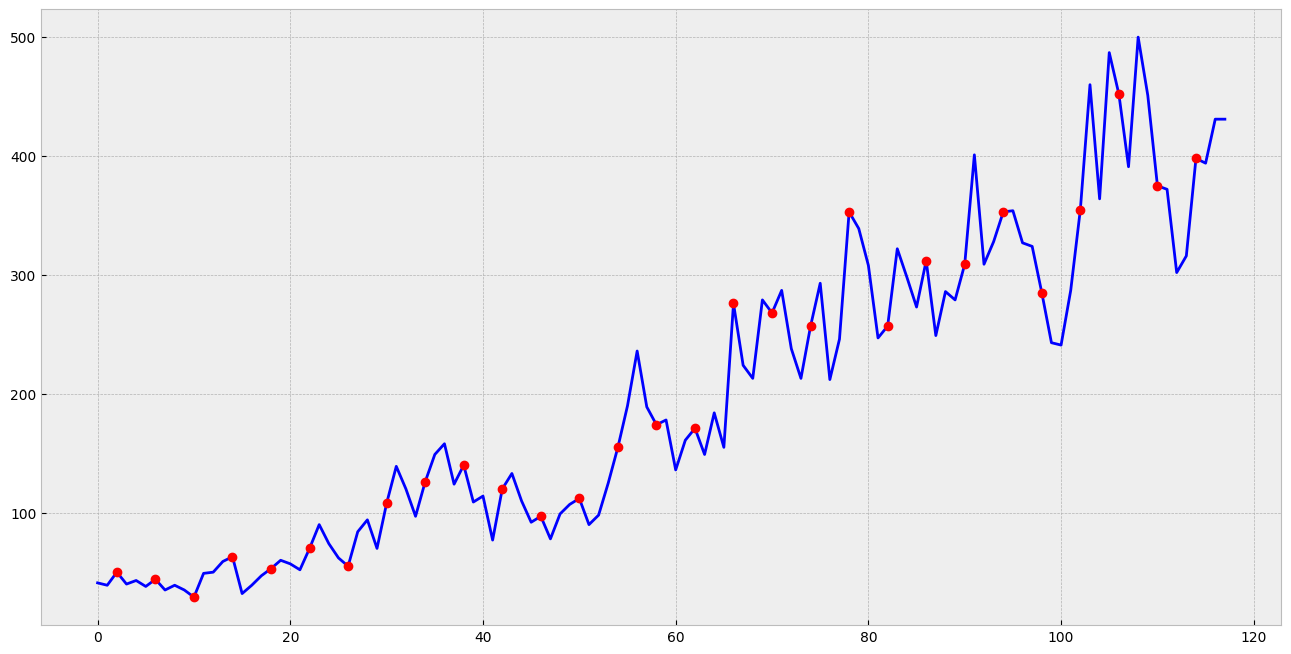

In [51]:
plot_ts_and_points(robberies_in_boston['Count'], 2, 4)

# Ищем сезонность для 

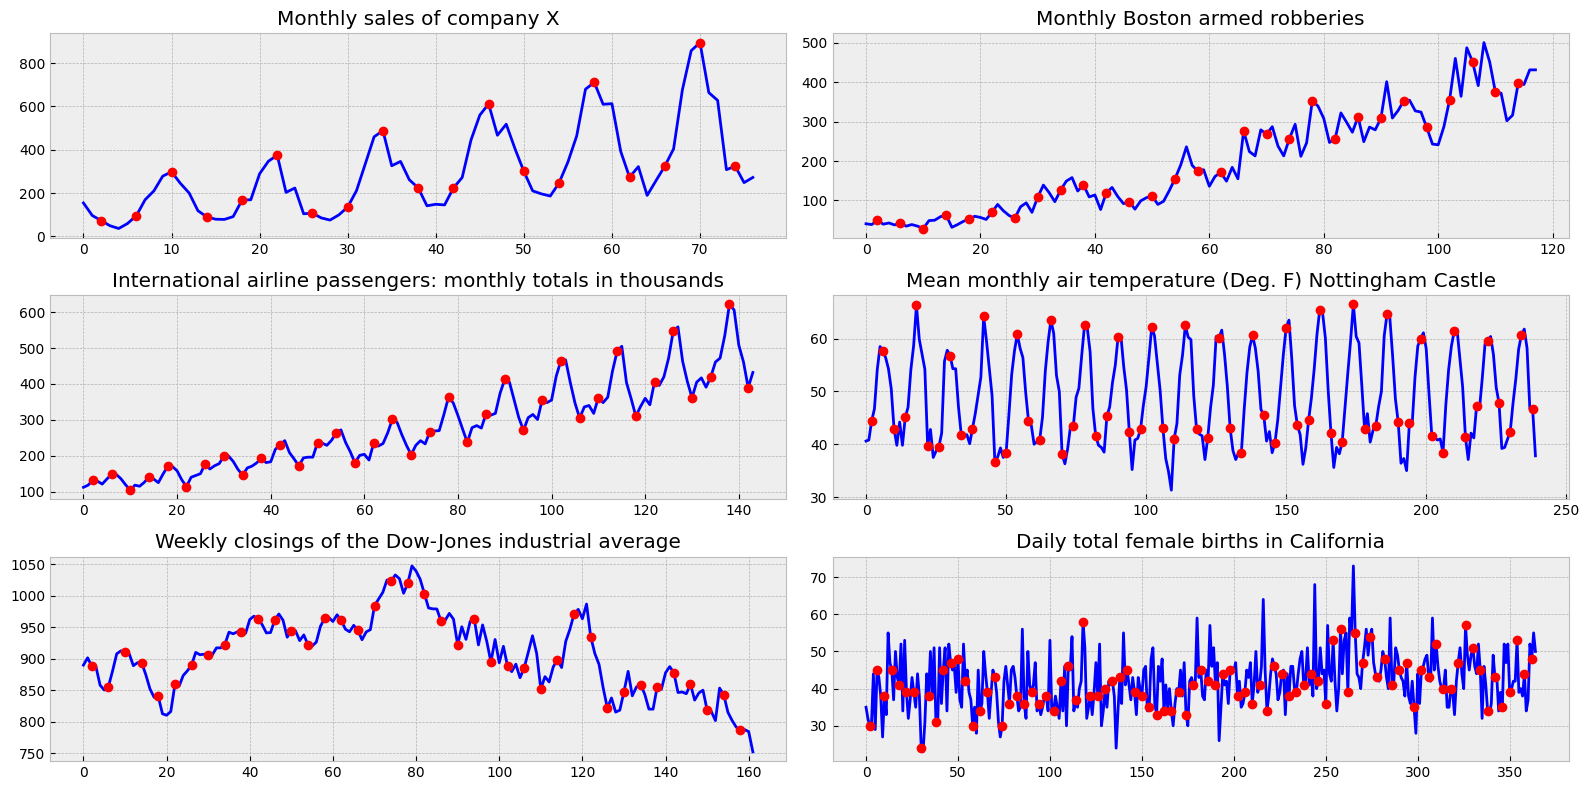

In [64]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        start_point =2
        step = 4
        ts = all_series[key]
        new_series = [None for i in range(len(ts))]
        for i in range(len(ts)):
            pos = start_point + step * i
            if pos >= len(ts):
                break
            new_series[pos] = ts[pos]
        new_series = pd.Series(new_series)
        new_series.plot(ax=ts_ax, style='ro')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### Довольно неплохо прослеживается наличие сезонности на "Monthly sales of company X", "International airlines passengers: mongthly total in thouands", "Mean monthly air temperature"

# Нормализуем дисперсию

In [65]:
from scipy.stats import boxcox

In [66]:
series = boxcox( all_series["International airline passengers: monthly totals in thousands"], 0)

# Нормализуем дисперсию для всех графиков

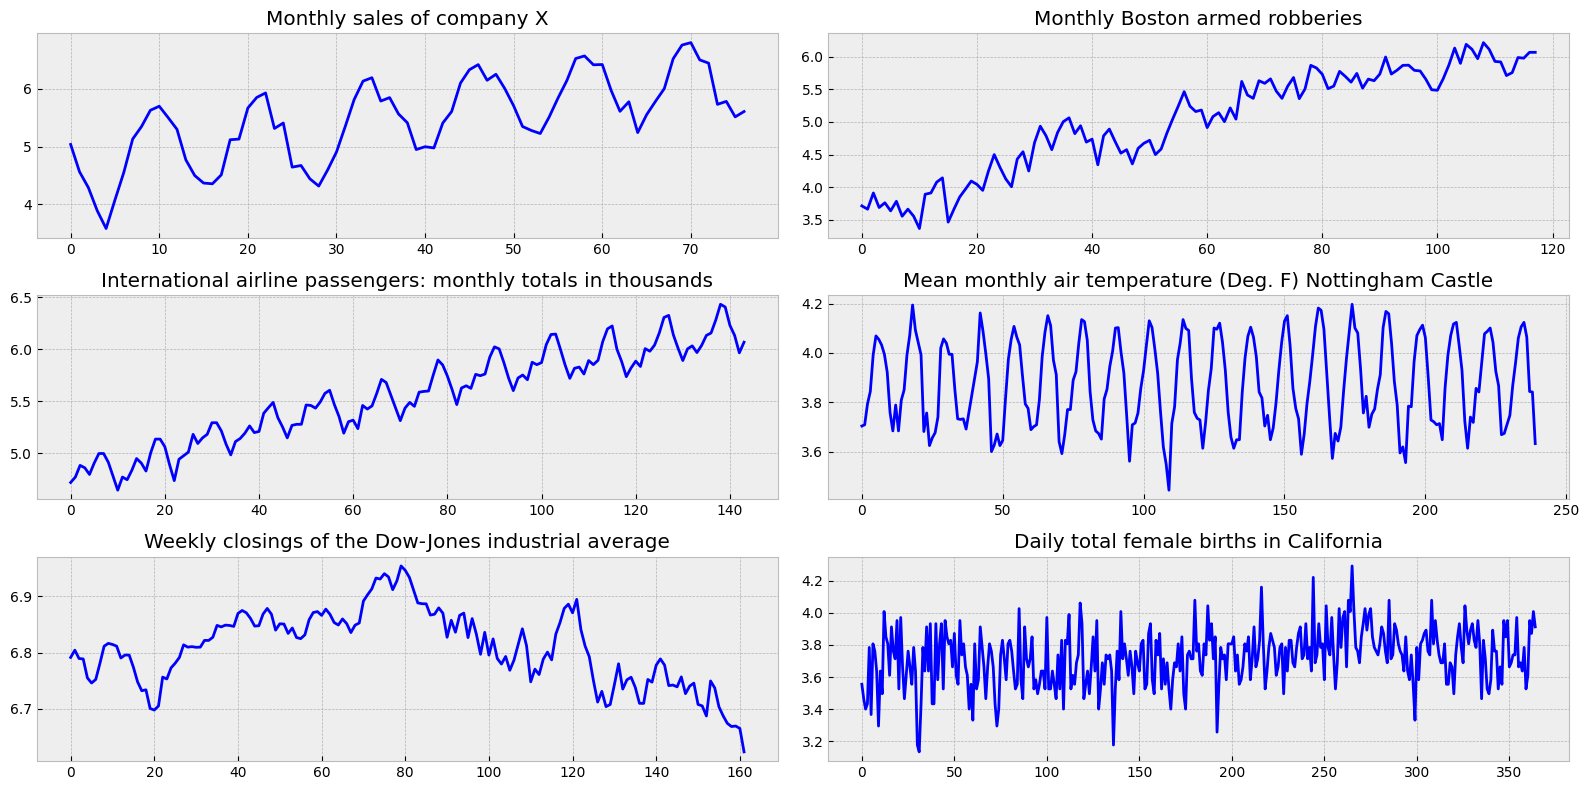

In [69]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        series = boxcox(all_series[key], 0)
        series.plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

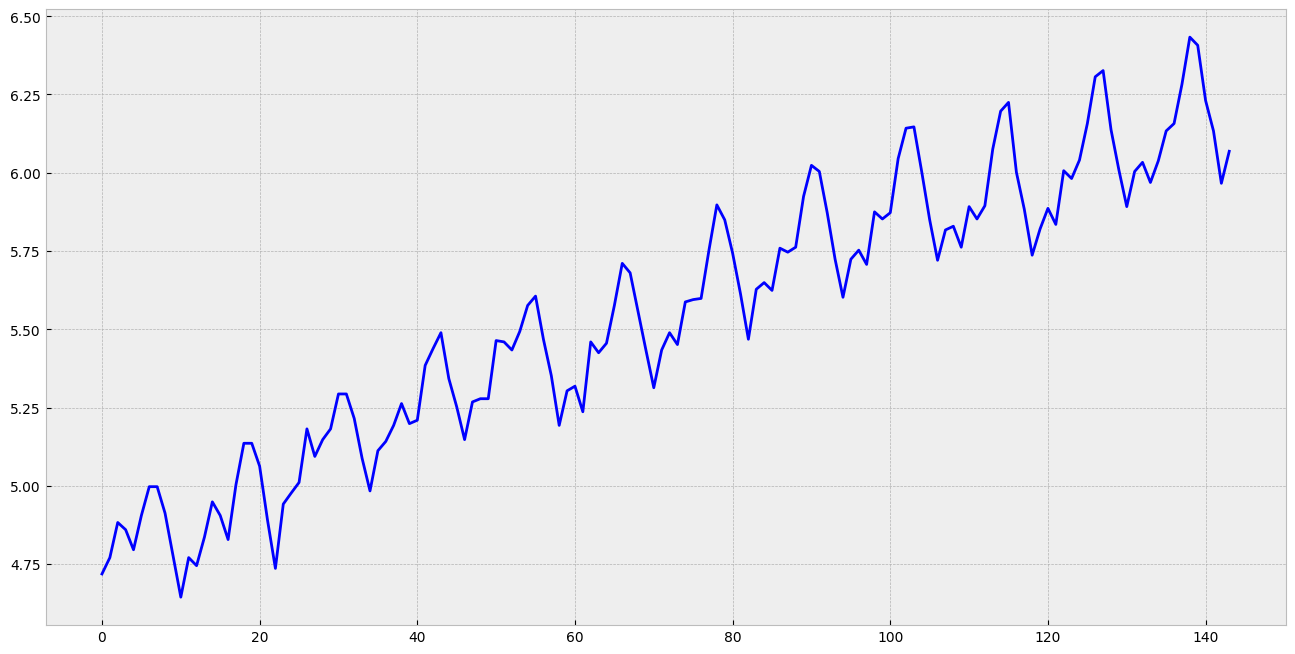

In [67]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Дифференцируем 

In [70]:
import numpy as np

In [33]:
series = np.diff(series, 1)

# Дифференцируем

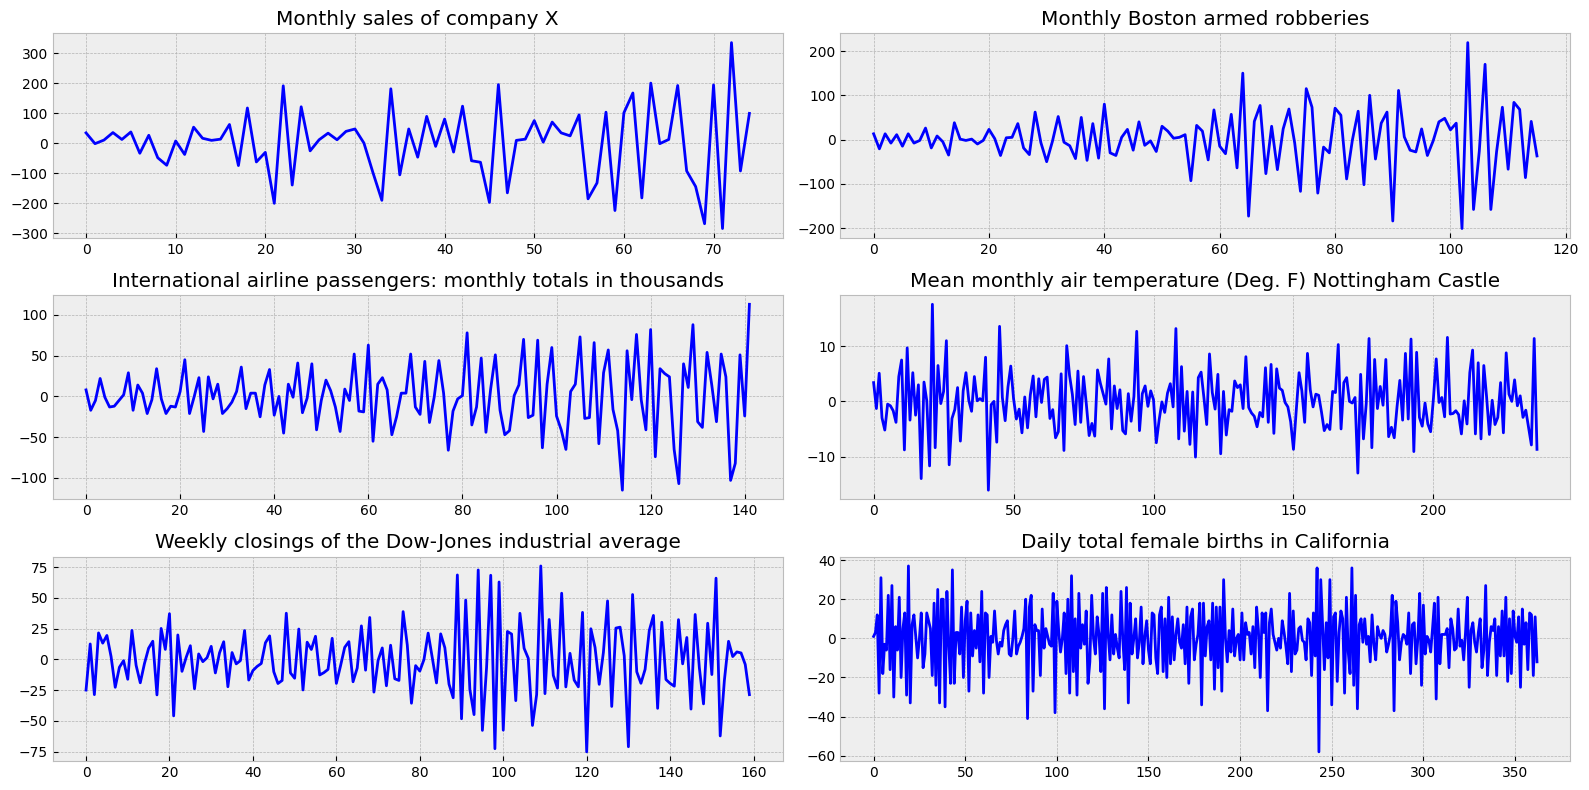

In [74]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        series = np.diff(all_series[key], 2)
        plt.plot(series, color='blue')
#         series.plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

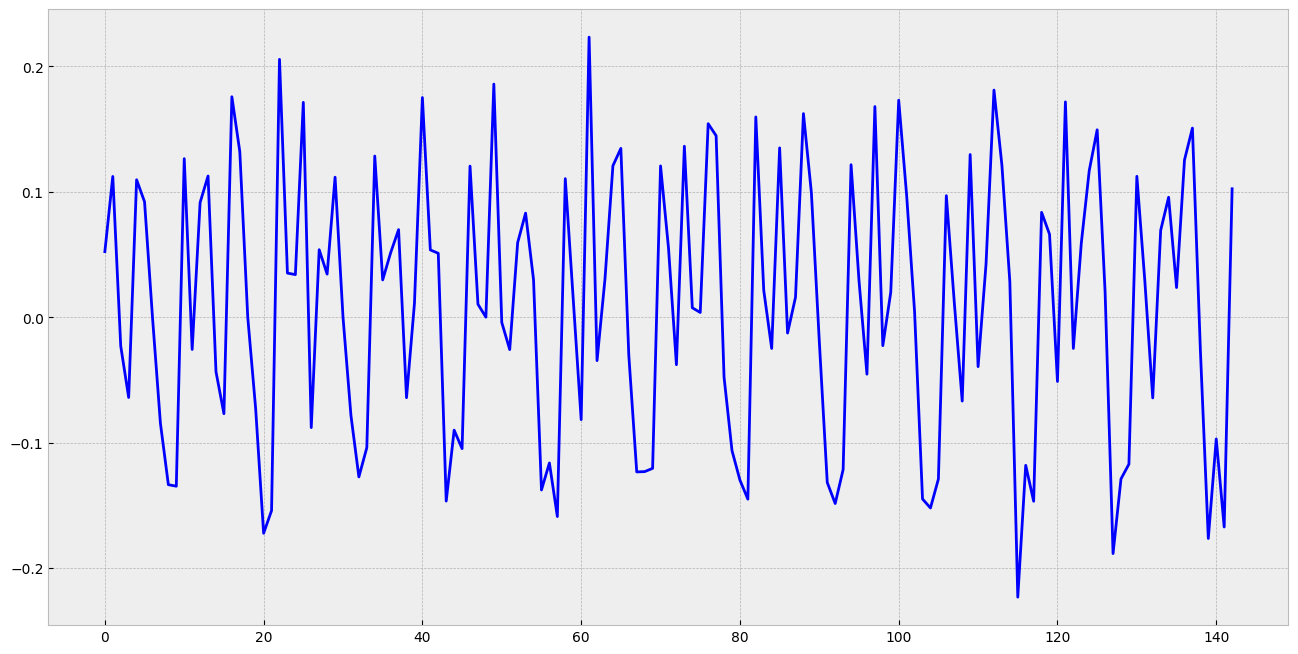

In [34]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Тест Дики-Фуллера 

In [75]:
from statsmodels.tsa.stattools import adfuller

In [86]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        if dfoutput['Critical Value (%s)' % key] < dfoutput['Test Statistic']:
            dfoutput['H_0'] = 'отвергаем, ряд стационарен '
        else:
            dfoutput['H_0'] = 'не отвергаем, ряд не стационарен '
#         dfoutput['HO'].apply(lambda x: 'ряд стационарен' if dfoutput['Test Statistic'] >dfoutput['Critical Value (%s)' % key] )
    print(dfoutput)

In [87]:
for i, key in enumerate(all_series.keys()):
    print(key)
    test_stationarity(all_series[key])
    print('\n')

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                                    0.654715
p-value                                           0.988889
#Lags Used                                            12.0
Number of Observations Used                           64.0
Critical Value (1%)                              -3.536928
H_0                            отвергаем, ряд стационарен 
Critical Value (5%)                              -2.907887
Critical Value (10%)                             -2.591493
dtype: object


Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                                    1.001102
p-value                                           0.994278
#Lags Used                                            11.0
Number of Observations Used                          106.0
Critical Value (1%)                              -3.493602
H_0                            отвергаем, ряд стационарен 
Critical Value (5%)                   

In [37]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [38]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Коррелограммы

In [39]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [40]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


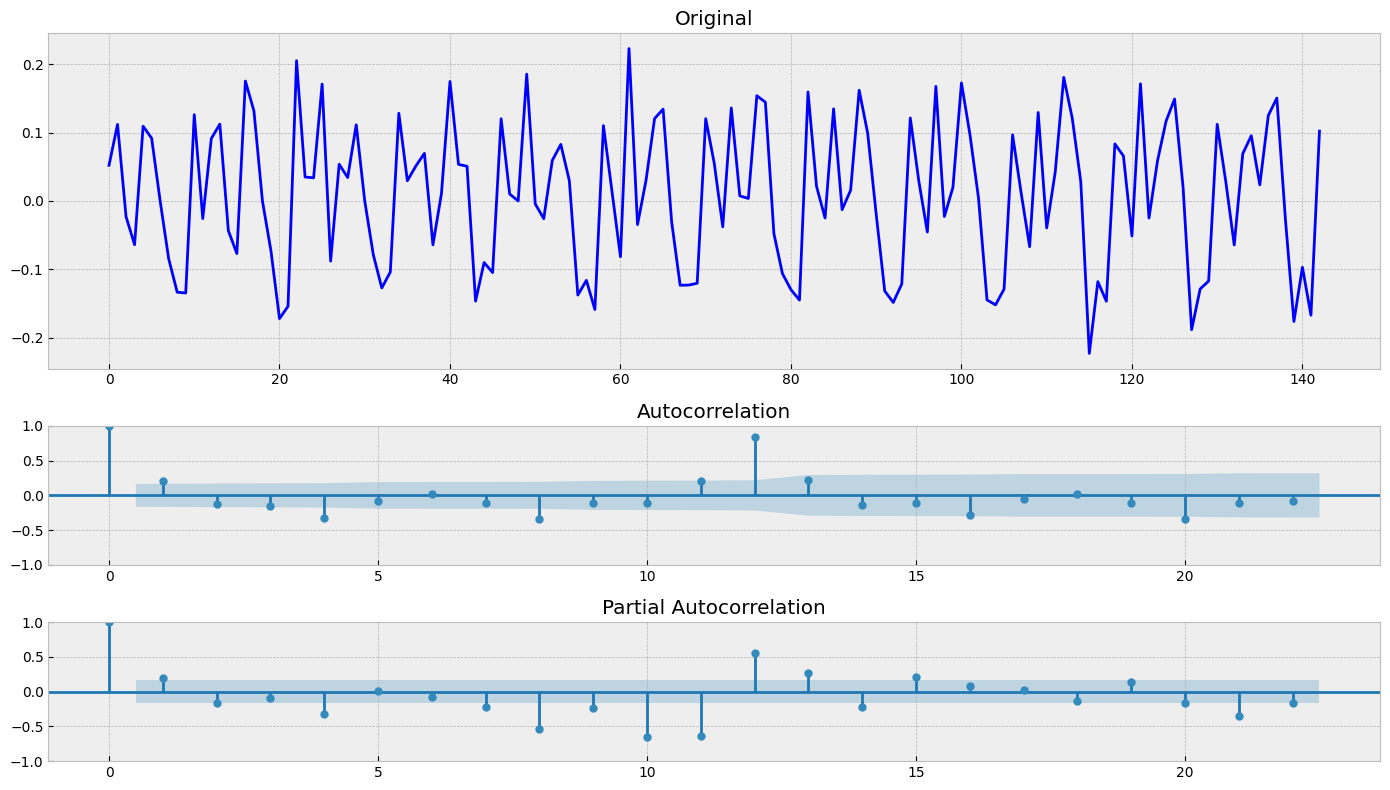

In [41]:
tsplot(series)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


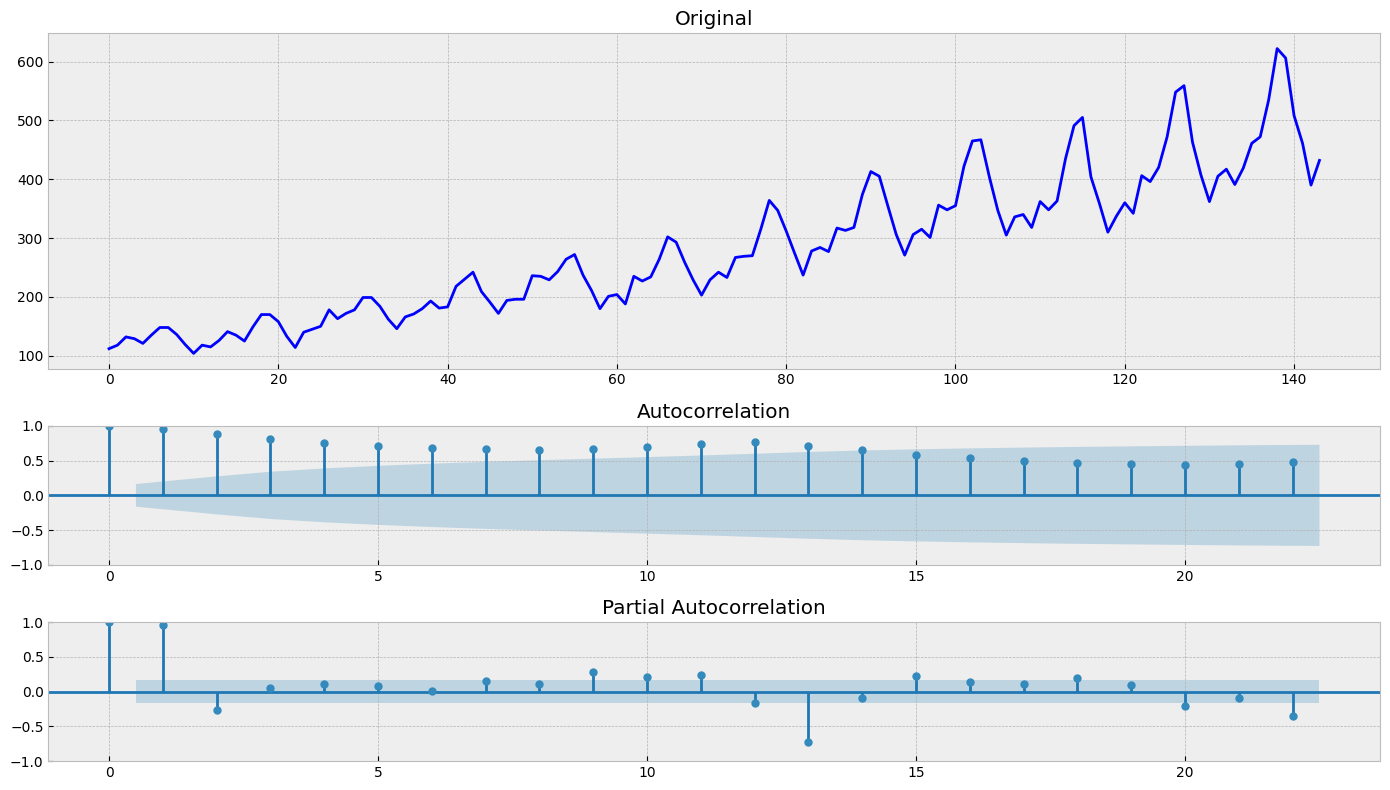

In [42]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

Monthly sales of company X


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(




Monthly Boston armed robberies


International airline passengers: monthly totals in thousands


Mean monthly air temperature (Deg. F) Nottingham Castle


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(




Weekly closings of the Dow-Jones industrial average


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(




Daily total female births in California




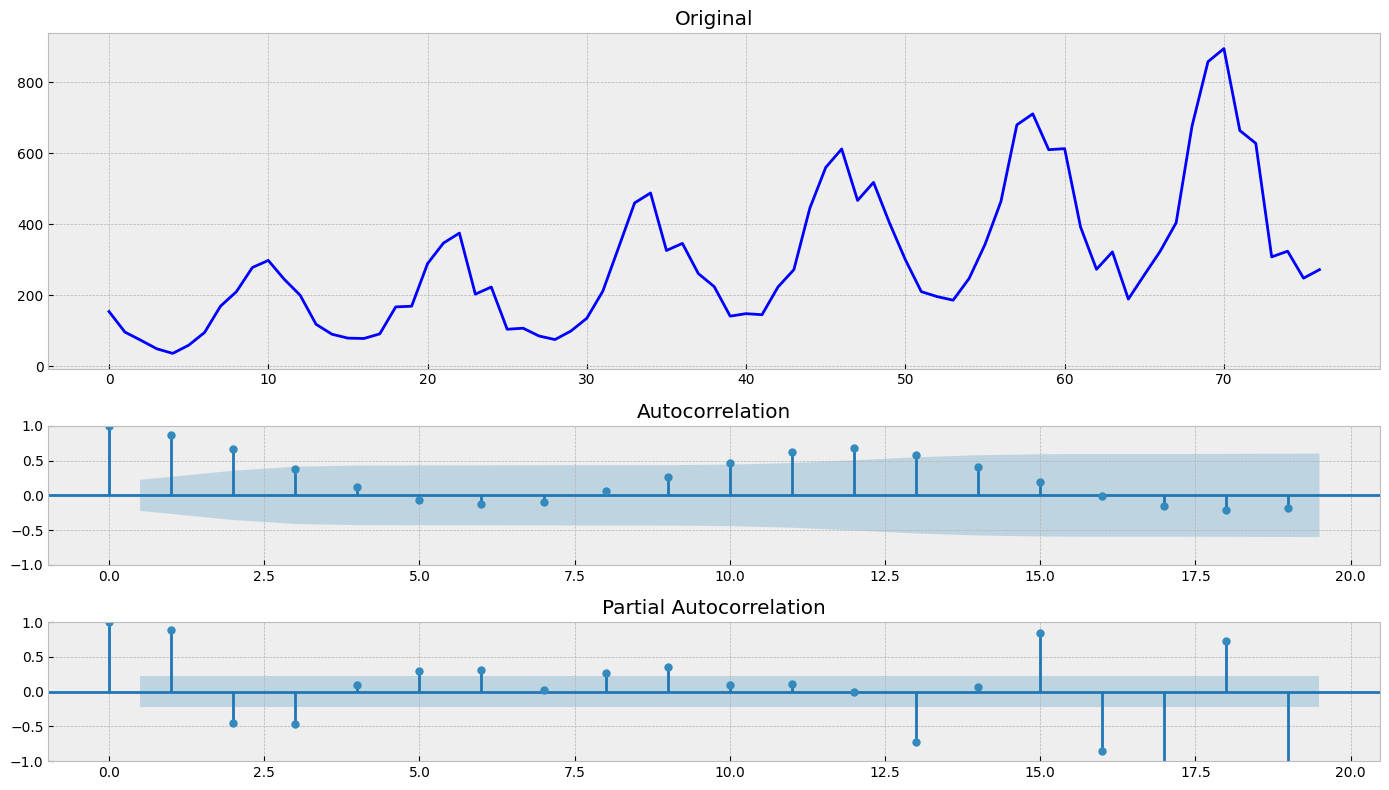

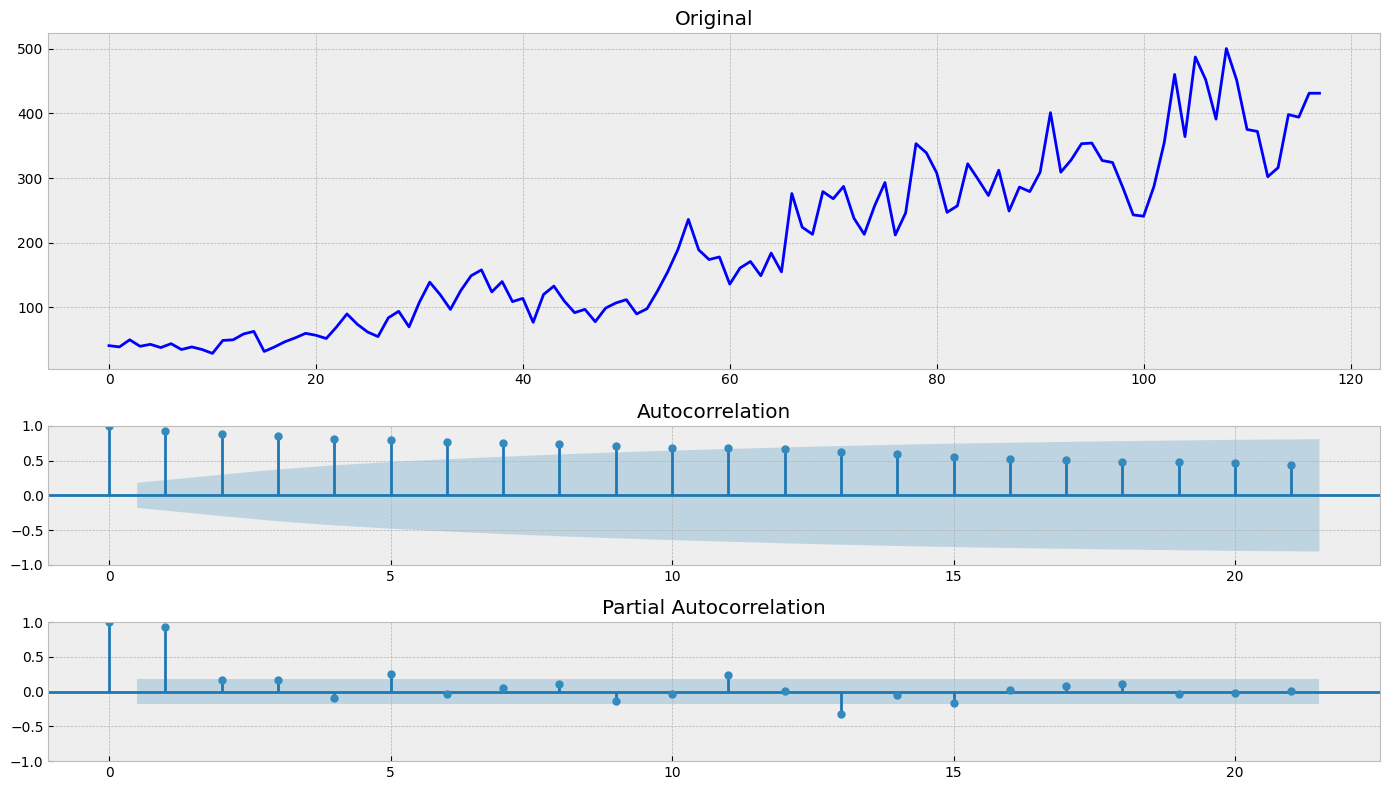

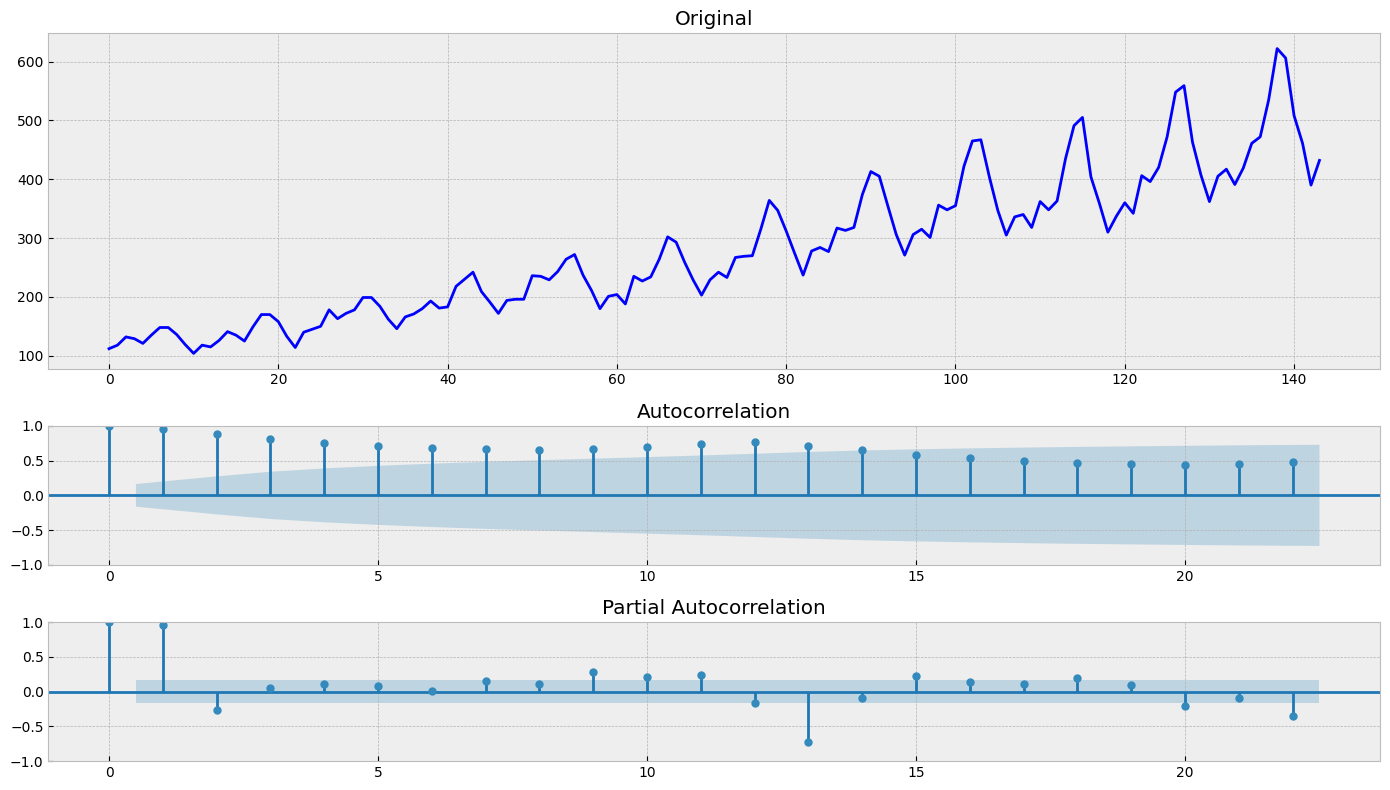

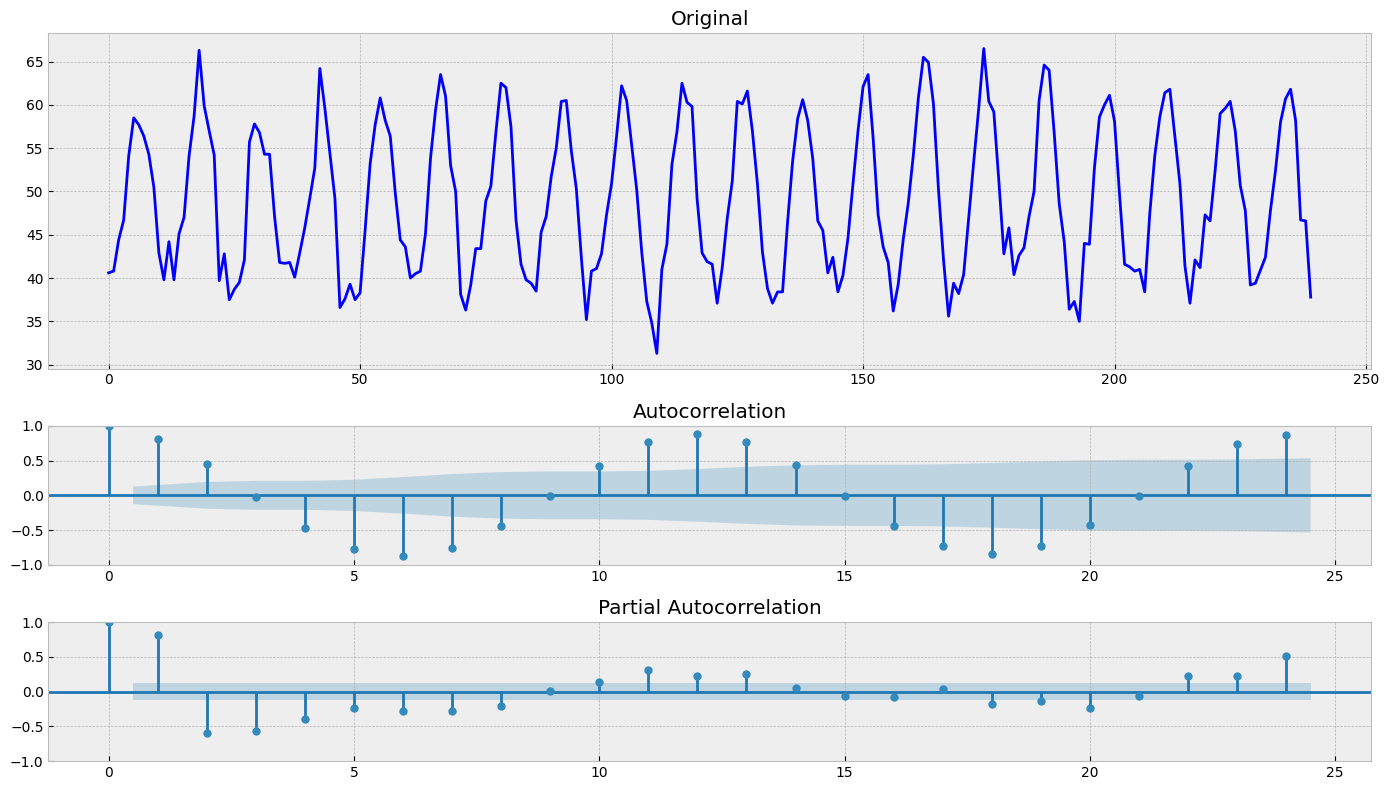

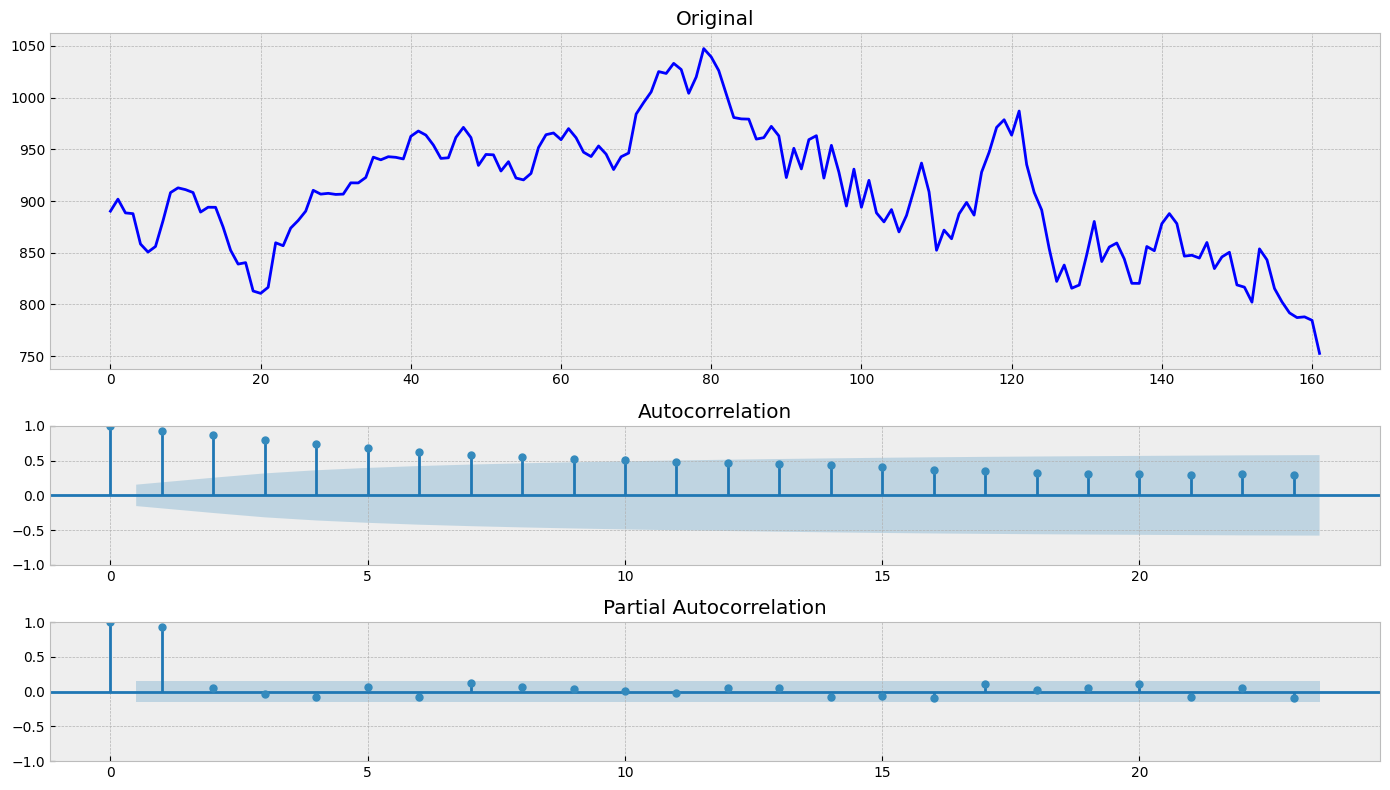

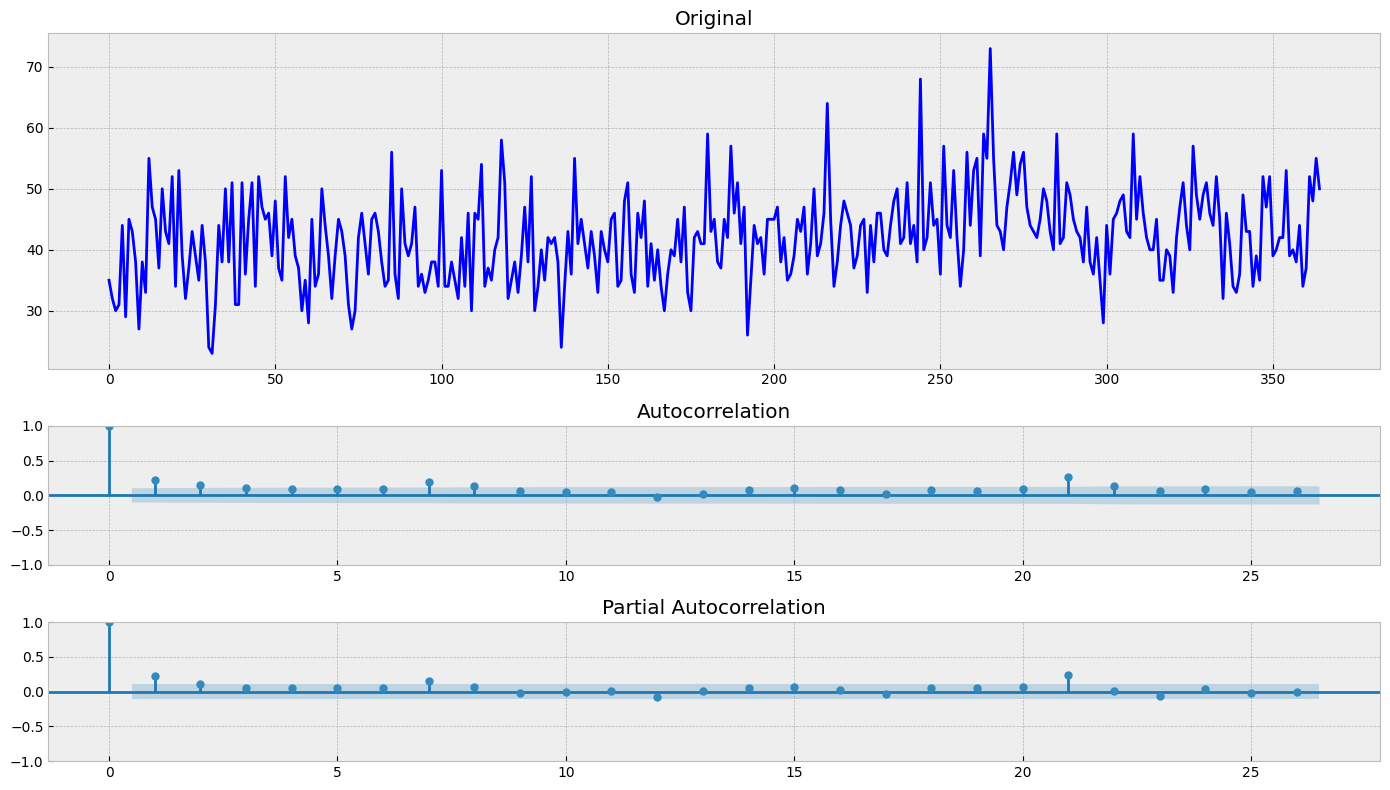

In [88]:
for i, key in enumerate(all_series.keys()):
    print(key)
    tsplot(all_series[key])
    print('\n')